# Importing Price data

In [192]:
import yfinance as yf

In [193]:
#Ticker: Enable download price history
sp500 = yf.Ticker("^GSPC")

In [194]:
#Query historical prices since beginning
sp500 = sp500.history(period="max")

In [195]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-21 00:00:00-05:00,4724.290039,4748.709961,4708.350098,4746.750000,3431180000,0.0,0.0
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0


In [196]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-12-14 00:00:00-05:00', '2023-12-15 00:00:00-05:00',
               '2023-12-18 00:00:00-05:00', '2023-12-19 00:00:00-05:00',
               '2023-12-20 00:00:00-05:00', '2023-12-21 00:00:00-05:00',
               '2023-12-22 00:00:00-05:00', '2023-12-26 00:00:00-05:00',
               '2023-12-27 00:00:00-05:00', '2023-12-28 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24114, freq=None)

# Cleaning & Visualizing stock market data

<Axes: xlabel='Date'>

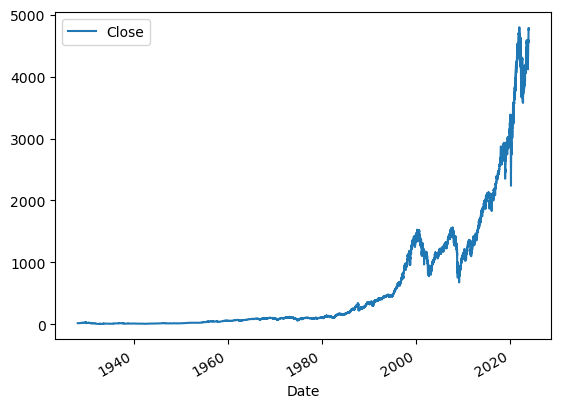

In [197]:
#Show index & Closing price
sp500.plot.line(y="Close", use_index=True)

In [198]:
# Display the columns in the DataFrame
print(sp500.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [199]:
# Check if the columns exist before deleting
if 'Dividends' in sp500.columns:
    del sp500['Dividends']

if 'Stock Splits' in sp500.columns:
    del sp500['Stock Splits']

# Setting target for Machine Learning (Price: Up/down)

In [200]:
#shift date back 1 day
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [201]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-12-21 00:00:00-05:00,4724.290039,4748.709961,4708.350098,4746.750000,3431180000,4754.629883
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,4774.750000
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4781.580078


In [202]:
#Target = Ask if today's price greater 
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [203]:
#Locate price after 1990 only 
sp500 = sp500.loc["1990-01-01":].copy()

In [204]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-12-21 00:00:00-05:00,4724.290039,4748.709961,4708.350098,4746.750000,3431180000,4754.629883,1
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,4774.750000,1
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4781.580078,1


# Training An Initial ML Model

In [205]:
from sklearn.ensemble import RandomForestClassifier #pickup linear / non linear relationships

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100] 
test = sp500.iloc[-100:]

#training set: all rows except last 100
#test set: last 100 rows

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"]) #Use predictors - Predict target

RandomForestClassifier(min_samples_split=100, random_state=1)

In [206]:
from sklearn.metrics import precision_score #accuracy of predictor direction

preds = model.predict(test[predictors])

In [207]:
import pandas as pd

preds = pd.Series(preds, index=test.index) #predictions classified in series

In [208]:
precision_score(test["Target"],preds)

0.5454545454545454

In [209]:
#Plot Predictions: Combine actual & predicted values
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

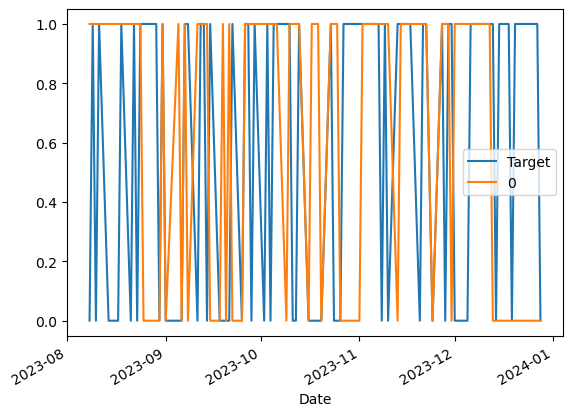

In [210]:
combined.plot()

# Building a backtesting system
#currently testing against last 100 days

In [211]:
def predict(train, test, predictors, model):
    # Training predictors & target
    model.fit(train[predictors], train["Target"]) 
    
    # Generating predictions
    preds = model.predict(test[predictors]) 
    
    # Combining model predictions into a series
    preds = pd.Series(preds, index=test.index, name="Predictions") 
    
    # Combining target and predictions into a DataFrame
    combined = pd.concat([test["Target"], preds], axis=1) 
    
    return combined

In [212]:
#250 trading days/year
#train model with 10years of data - training model yearly

def backtest(data, model, predictors, start=2500, step=250):
    # List to store predictions for each iteration
    all_predictions = []

    # Loop over the data in a rolling window
    for i in range(start, data.shape[0], step):
        # Create a training set from the beginning up to the current index
        train = data.iloc[0:i].copy()

        # Create a testing set from the current index to the next step (250 days)
        test = data.iloc[i:(i + step)].copy()

        # Use the 'predict' function to generate predictions for the test set
        predictions = predict(train, test, predictors, model)

        # Append the predictions to the list
        all_predictions.append(predictions)

    # Concatenate all the predictions into a single DataFrame
    return pd.concat(all_predictions)


In [213]:
predictions = backtest(sp500, model, predictors)

In [214]:
predictions["Predictions"].value_counts()

Predictions
0    3468
1    2596
Name: count, dtype: int64

In [215]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [216]:
#Percentage of days market actually went up
predictions["Target"].value_counts() / predictions.shape[0]

#since target > predictions (would be better to just buy sell everyday)

Target
1    0.534631
0    0.465369
Name: count, dtype: float64

# Adding additional predictors to model

In [217]:
# List of time horizons for rolling calculations
horizons = [2, 5, 60, 250, 1000]

# List to store the names of new predictor columns
new_predictors = []

# Iterate over each time horizon
for horizon in horizons:
    # Calculate rolling averages for the specified horizon
    rolling_averages = sp500.rolling(horizon).mean()

    # Create a new column for close ratio using the calculated rolling average
    ratio_column = f"Close_Ratio_{horizon}"
    sp500.loc[:, ratio_column] = sp500["Close"] / rolling_averages["Close"]

    # Create a new column for trend using the rolling sum of the target variable
    trend_column = f"Trend_{horizon}"
    sp500.loc[:, trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    # Add new columns to the list of predictors
    new_predictors += [ratio_column, trend_column]

In [218]:
sp500 = sp500.dropna()

In [219]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,4746.750000,1,0.992604,1.0,0.993476,3.0,1.061612,37.0,1.102599,134.0,1.185835,528.0
2023-12-21 00:00:00-05:00,4724.290039,4748.709961,4708.350098,4746.750000,3431180000,4754.629883,1,1.005124,1.0,1.002557,3.0,1.070644,37.0,1.112992,135.0,1.197601,528.0
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,4774.750000,1,1.000829,2.0,1.002720,4.0,1.070590,37.0,1.113889,135.0,1.199129,529.0


# Improving model

In [220]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [221]:
def predict(train, test, predictors, model):
    # Training predictors & target
    model.fit(train[predictors], train["Target"]) 
    
    # Generating predictions
    preds = model.predict_proba(test[predictors]) [:,1]#proba: probability of up/down trend
    preds[preds >= .6] = 1 #reduce no. of predictions, but increase effectiveness when generated
    preds[preds < .6] = 0
    
    # Combining model predictions into a series
    preds = pd.Series(preds, index=test.index, name="Predictions") 
    
    # Combining target and predictions into a DataFrame
    combined = pd.concat([test["Target"], preds], axis=1) 
    
    return combined

In [222]:
predictions = backtest(sp500, model, new_predictors)

In [223]:
predictions["Predictions"].value_counts()

Predictions
0.0    4233
1.0     830
Name: count, dtype: int64

In [224]:
precision_score(predictions["Target"], predictions["Predictions"])

0.572289156626506